# Details: Mina Jamshidian D20124995

Machine Learning Assignment
https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations

# Packages and Importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib as mpl
import time

from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set Matplotlib options
%matplotlib inline

mpl.rcParams['figure.figsize'] = (20, 5)
mpl.rcParams['axes.grid'] = False

In [4]:
articles_main = pd.read_csv("../input/articles.csv", on_bad_lines='skip')
customers_main = pd.read_csv("../input/customers.csv", on_bad_lines='skip')
train_main = pd.read_csv("../input/transactions_train.csv", on_bad_lines='skip')

In [5]:
articles = articles_main.copy()

In [6]:
customers = customers_main.copy()

In [7]:
transactions = train_main.copy()

# Data Prepration

## Articles

In [8]:
articles.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [9]:
articles.shape

(105542, 25)

In [10]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [11]:
# as it is shown some columns have the same value
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [12]:
# therefor all the same column would be droped and prod_name which is related to the name of product would be removed
articles = articles.drop([
    "product_code", "product_type_no", "graphical_appearance_no", 
    "colour_group_code", "perceived_colour_value_id", "perceived_colour_master_id", 
    "department_no", "department_name", "index_code", "index_group_no", "section_no", 
    "garment_group_no", "detail_desc","prod_name"], 
    axis=1
)

In [13]:
articles.nunique()

article_id                      105542
product_type_name                  131
product_group_name                  19
graphical_appearance_name           30
colour_group_name                   50
perceived_colour_value_name          8
perceived_colour_master_name        20
index_name                          10
index_group_name                     5
section_name                        56
garment_group_name                  21
dtype: int64

In [14]:
# Finding missing value
articles.isnull().sum()

article_id                      0
product_type_name               0
product_group_name              0
graphical_appearance_name       0
colour_group_name               0
perceived_colour_value_name     0
perceived_colour_master_name    0
index_name                      0
index_group_name                0
section_name                    0
garment_group_name              0
dtype: int64

In [15]:
articles.duplicated().value_counts()

False    105542
dtype: int64

## Customers

In [16]:
customers.head(2)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...


In [17]:
# Deleting all features have one value
# get number of unique values for each column
counts = customers.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
colname = customers.columns[to_del]
print (colname)# drop useless columns
customers.drop(colname, axis=1, inplace=True)
print(customers.shape)

Index(['FN', 'Active'], dtype='object')
(1371980, 5)


In [18]:
# pstal code seems to be the same as customer_id then it would be deleted
customers = customers.drop(["postal_code"], axis=1)

In [19]:
customers.isnull().sum()

customer_id                   0
club_member_status         6062
fashion_news_frequency    16009
age                       15861
dtype: int64

In [20]:
#Checking the unique value of club_member_status feature
customers['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [21]:
customers.loc[~customers['club_member_status'].isin(['ACTIVE', 'PRE-CREATE']), 'club_member_status'] = 'LEFT CLUB'

In [22]:
# Checking the unique value of fashion_news_frequency feature
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [23]:
customers.loc[~customers['fashion_news_frequency'].isin
              (['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'

In [24]:
# Filling the missing values in the age column with the median age, 
# since there are few missing values in this column
customers['age'] = customers['age'].fillna(customers['age'].median())

In [25]:
customers.duplicated().value_counts()

False    1371980
dtype: int64

In [26]:
customers.isnull().sum()

customer_id               0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

In [33]:
customers.nunique()

customer_id               1371980
club_member_status              3
fashion_news_frequency          3
age                            84
dtype: int64

## Transactions 

In [34]:
transactions.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2


In [35]:
transactions.shape

(31788324, 5)

In [36]:
transactions.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

In [37]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [38]:
transactions.duplicated().value_counts()

False    28813419
True      2974905
dtype: int64

In [39]:
# transactions.drop_duplicates()

In [40]:
transactions['year'] = pd.DatetimeIndex(transactions['t_dat']).year
transactions['month'] = pd.DatetimeIndex(transactions['t_dat']).month
transactions.tail()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020,9
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020,9
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020,9
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020,9
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2,2020,9


In [41]:
## Find weeks since each transaction train ended

In [42]:
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])
transactions["week_since"] = (transactions["t_dat"].max() - transactions["t_dat"]).dt.days // 7
transactions["week_since"].value_counts()
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week_since
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018,9,104
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018,9,104
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018,9,104
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018,9,104
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018,9,104


### Frequently Customers

<AxesSubplot:xlabel='year'>

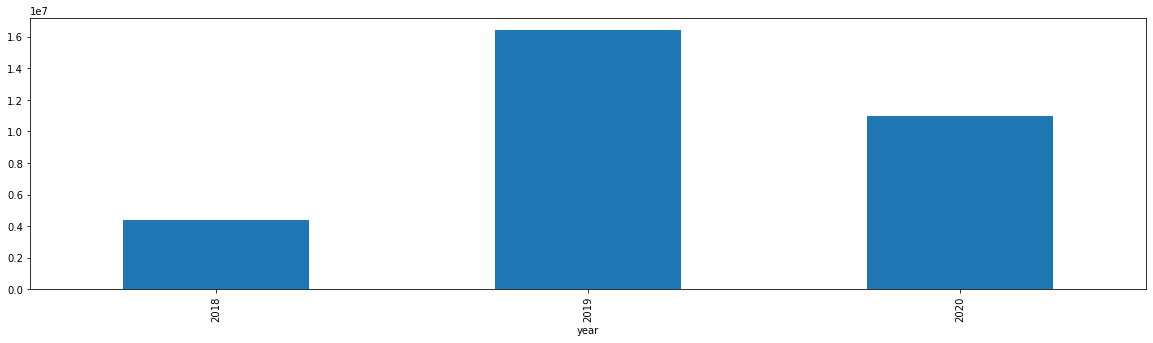

In [43]:
# more frequently customers in each year
transactions[['year', 'customer_id']].groupby('year').count().plot(kind='bar', legend=None)

In [44]:
last_two_year_transactions=transactions[(transactions.year >= 2019)]

<AxesSubplot:xlabel='month'>

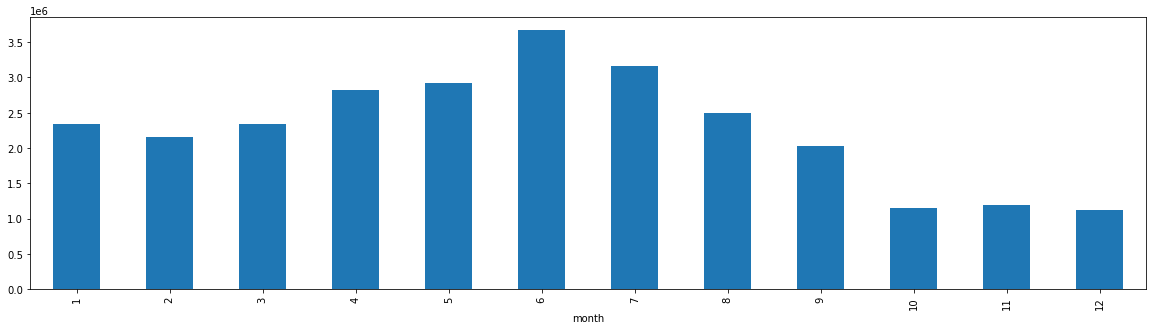

In [45]:
# more frequently customers in each month for 2019 and 2020

last_two_year_transactions[['month', 'customer_id']].groupby('month').count().plot(kind='bar', legend=None)

In [46]:
#popular months in last two years
popular_months=last_two_year_transactions[(last_two_year_transactions.month<=9)]

In [47]:
#Count CUSTOMER
freq_customer_count= popular_months["customer_id"].value_counts().reset_index()

freq_customer_count.columns= ['customer_id','count_cust']
freq_customer_count

,customer_id,count_cust
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1431
1,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1148
2,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1077
3,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1048
4,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1045
...,...,...
1180616,b8a2292d8e1e663fcc087df7faae88de3f52f07737c513...,1
1180617,fa9e6a1c75ce969fb796e245ad9b6d48b653f42513eb30...,1
1180618,ec3fc322097b2e1d0703497a62164e4c47b915a035c2f9...,1
1180619,ebd0f2361970a14681bae8b1d4090cac278cd4083f0d24...,1


In [48]:
freq_customer_count['count_cust'].describe().round()

count    1180621.0
mean          20.0
std           32.0
min            1.0
25%            3.0
50%            9.0
75%           24.0
max         1431.0
Name: count_cust, dtype: float64

We can see about 75% of customer buy below 25 times. Only about 25% of customer buy more than 25 times. As we have so many customers in our data, we will limit customers that buy articles above 25 times in last six month.

In [49]:
# Limiting cust_Count above 25 count.
popularity_threshold = 25
fr_cust = freq_customer_count.query('count_cust >= @popularity_threshold')

In [50]:
freq_cust_trans = transactions[transactions['customer_id'].isin(fr_cust['customer_id'])]

### Frequenty Articles

In [51]:
## Transactions in the last months

In [52]:
last_month_transactions=transactions[(transactions.week_since>=0) & (transactions.week_since<4)]

In [53]:
last_month_article_count= last_month_transactions["article_id"].value_counts().reset_index()
last_month_article_count.columns= ['article_id','count_art']
last_month_article_count

,article_id,count_art
0,751471001,2703
1,915526001,2340
2,915529003,2301
3,918292001,2233
4,751471043,2214
...,...,...
28292,794216001,1
28293,750565003,1
28294,722292001,1
28295,803190001,1


In [54]:
last_month_article_count['count_art'].describe()

count    28297.000000
mean        36.872813
std        108.455142
min          1.000000
25%          2.000000
50%          6.000000
75%         24.000000
max       2703.000000
Name: count_art, dtype: float64

In [55]:
# The median of articles that were bought just two
# Let’s look at from 90% to 99% to identify the total article id that was choosen by customer

print(last_month_article_count['count_art'].quantile(np.arange(.9, 1, .01)))

0.90     83.00
0.91     93.00
0.92    105.00
0.93    120.00
0.94    141.00
0.95    168.00
0.96    204.00
0.97    261.00
0.98    355.08
0.99    522.00
Name: count_art, dtype: float64


We can see about 95% of articles sells below 150 times.
Only about 5% of articles more than sold more than 150 times.
As we have so artciles  in our data, we will limit articles that sold above 150  times in last month.

In [56]:
# Limiting art_Count above 150 count.
popularity_threshold = 150
freq_art = last_month_article_count.query('count_art >= @popularity_threshold')
freq_art

,article_id,count_art
0,751471001,2703
1,915526001,2340
2,915529003,2301
3,918292001,2233
4,751471043,2214
...,...,...
1582,680391030,150
1583,881919003,150
1584,865935003,150
1585,898439003,150


In [57]:
freq_art_cust_trans = freq_cust_trans[freq_cust_trans['article_id'].isin(freq_art['article_id'])]
freq_art_cust_trans

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week_since
86,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,673677002,0.016932,2,2018,9,104
88,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,611415001,0.016932,2,2018,9,104
112,2018-09-20,008a118b7c72fd3b8a614eb2672ddfc2a78434c5776af2...,578476001,0.048288,1,2018,9,104
130,2018-09-20,00ac5119d21281802ecd309e8c7fa0b598e0be861f21ca...,610776002,0.008458,2,2018,9,104
160,2018-09-20,00cf4505ba84c01f03c47829352054483acb59a9492ed0...,179208001,0.016932,2,2018,9,104
...,...,...,...,...,...,...,...,...
31788317,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,902288001,0.022017,2,2020,9,0
31788318,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,856440002,0.042356,2,2020,9,0
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020,9,0
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020,9,0


In [58]:
# Last week Top 12 Arilces
top12_last_m= last_month_transactions["article_id"].value_counts().reset_index()

top12_last_m.columns= ['article_id','count_art']
top12_last_m = top12_last_m[0:12]
top12_last_m

,article_id,count_art
0,751471001,2703
1,915526001,2340
2,915529003,2301
3,918292001,2233
4,751471043,2214
5,706016001,2166
6,898694001,2029
7,448509014,1925
8,909370001,1868
9,863595006,1772


In [59]:
df_train_original = last_month_transactions.loc[last_month_transactions['week_since'] == 0 ]
top12 = ' 0' + ' 0'.join(df_train_original['article_id'].value_counts().index.astype('str')[:12])
print("Last week's top 12 popular items:")
print( top12 )

Last week's top 12 popular items:
 0924243001 0924243002 0918522001 0923758001 0866731001 0909370001 0751471001 0915529003 0915529005 0448509014 0762846027 0714790020


## Merging  Datas

In [60]:
freq_customers=customers[customers['customer_id'].isin(freq_art_cust_trans['customer_id'])]
freq_articles=articles[articles['article_id'].isin(freq_art_cust_trans['article_id'])]

In [61]:
freq_info = freq_art_cust_trans.merge(freq_customers,on='customer_id').merge(freq_articles,on='article_id')
freq_info.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week_since,club_member_status,fashion_news_frequency,...,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,index_name,index_group_name,section_name,garment_group_name
0,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,673677002,0.016932,2,2018,9,104,ACTIVE,None,...,Sweater,Garment Upper body,Solid,Black,Dark,Black,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
1,2019-09-28,00cf4505ba84c01f03c47829352054483acb59a9492ed0...,673677002,0.020322,2,2019,9,51,ACTIVE,None,...,Sweater,Garment Upper body,Solid,Black,Dark,Black,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
2,2018-09-20,01959be607170cc2f092ee8fd13eda251b13cde70ef38d...,673677002,0.015237,1,2018,9,104,ACTIVE,Regularly,...,Sweater,Garment Upper body,Solid,Black,Dark,Black,Ladieswear,Ladieswear,Womens Tailoring,Knitwear


In [62]:
freq_infoo=freq_info.dropna()
freq_infoo=freq_info.drop_duplicates()
freq_infoo

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week_since,club_member_status,fashion_news_frequency,...,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,index_name,index_group_name,section_name,garment_group_name
0,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,673677002,0.016932,2,2018,9,104,ACTIVE,None,...,Sweater,Garment Upper body,Solid,Black,Dark,Black,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
1,2019-09-28,00cf4505ba84c01f03c47829352054483acb59a9492ed0...,673677002,0.020322,2,2019,9,51,ACTIVE,None,...,Sweater,Garment Upper body,Solid,Black,Dark,Black,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
2,2018-09-20,01959be607170cc2f092ee8fd13eda251b13cde70ef38d...,673677002,0.015237,1,2018,9,104,ACTIVE,Regularly,...,Sweater,Garment Upper body,Solid,Black,Dark,Black,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
3,2020-09-13,05045a3934ec16ae1549c3f2309803963cf649ece8e102...,673677002,0.025136,2,2020,9,1,ACTIVE,None,...,Sweater,Garment Upper body,Solid,Black,Dark,Black,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
4,2018-09-20,08519dc5924824ca78ad845bcb7f29b16c280885cb00f2...,673677002,0.016932,2,2018,9,104,ACTIVE,Regularly,...,Sweater,Garment Upper body,Solid,Black,Dark,Black,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063648,2020-09-07,9625c128432f8402a904e2514d453aefb657558801c160...,903824003,0.050831,1,2020,9,2,ACTIVE,Regularly,...,Sweater,Garment Upper body,Other structure,Red,Medium Dusty,Red,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
2063649,2020-09-10,71ee93546889e05b7de379cd0f9fe92aa857a5c7263276...,903824003,0.044051,1,2020,9,1,ACTIVE,None,...,Sweater,Garment Upper body,Other structure,Red,Medium Dusty,Red,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
2063650,2020-09-12,59e536939efb37b10d63072e12581ea74df0d77e7a00f6...,903824003,0.048237,1,2020,9,1,ACTIVE,None,...,Sweater,Garment Upper body,Other structure,Red,Medium Dusty,Red,Ladieswear,Ladieswear,Womens Tailoring,Knitwear
2063651,2020-09-20,77a299dd2e978509d36b6cd104fa8e7078da8303d89957...,903824003,0.050831,1,2020,9,0,ACTIVE,Regularly,...,Sweater,Garment Upper body,Other structure,Red,Medium Dusty,Red,Ladieswear,Ladieswear,Womens Tailoring,Knitwear


In [63]:
freq_infoo["age"].min()

16.0

In [64]:
freq_infoo["age"].max()

99.0

In [65]:
def get_age(age):
    if 16 <= age < 25:
        return "16-24"
    elif 25 <= age < 35:
        return "25-34"
    elif 35 <= age < 45:
        return "35-44"
    elif 45 <= age < 55:
        return "45-54"
    elif 55 <= age < 65:
        return "55-64"
    else:
        return "64+"

In [66]:
freq_infoo["age_range"] = freq_infoo["age"].apply(get_age)

In [67]:
freq_infoo = freq_infoo.drop(["age"], axis=1)

In [68]:
freq_infoo_price = (freq_infoo.groupby(["article_id"]).agg({"price": ["min", "max", "mean", "std"]}))

freq_infoo_price.columns = freq_infoo_price.columns.map(lambda x: "_".join(x))

freq_infoo_price = freq_infoo_price.fillna(0.0)

In [69]:
freq_infoo_price

,price_min,price_max,price_mean,price_std
article_id,,,,
111586001,0.001339,0.016983,0.012322,0.002713
111593001,0.002814,0.016932,0.012386,0.002715
123173001,0.001559,0.016932,0.012374,0.002867
148033001,0.000424,0.013542,0.011107,0.002464
156231001,0.001339,0.008458,0.006708,0.001560
...,...,...,...,...
937252001,0.114390,0.152525,0.149649,0.008392
938804001,0.043203,0.067780,0.065090,0.004923
942187001,0.013542,0.016932,0.016766,0.000515


In [70]:
freq_infoo_mean_cus_art = (freq_infoo.groupby(["customer_id", "article_id"]).size().groupby(["article_id"]).mean()
        .reset_index().rename({0: "art_mean_count_cust"}, axis=1)
)
freq_infoo_mean_cus_art

,article_id,art_mean_count_cust
0,111586001,1.368181
1,111593001,1.428295
2,123173001,1.285387
3,148033001,1.249903
4,156231001,1.770887
...,...,...
1582,937252001,1.136000
1583,938804001,1.033435
1584,942187001,1.049550
1585,944506001,1.055046


In [71]:
freq_infoo = (freq_infoo.merge(freq_infoo_price, on="article_id", how="left")
              .merge(freq_infoo_mean_cus_art, on="article_id", how="left").fillna(0.0))

In [72]:
freq_infoo.nunique()

t_dat                              734
customer_id                     266392
article_id                        1587
price                             4592
sales_channel_id                     2
year                                 3
month                               12
week_since                         105
club_member_status                   3
fashion_news_frequency               3
product_type_name                   46
product_group_name                  11
graphical_appearance_name           21
colour_group_name                   38
perceived_colour_value_name          7
perceived_colour_master_name        18
index_name                           6
index_group_name                     4
section_name                        29
garment_group_name                  19
age_range                            6
price_min                          395
price_max                           32
price_mean                        1586
price_std                         1587
art_mean_count_cust      

In [73]:
final_data = freq_infoo.copy()

In [74]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808228 entries, 0 to 1808227
Data columns (total 26 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   t_dat                         datetime64[ns]
 1   customer_id                   object        
 2   article_id                    int64         
 3   price                         float64       
 4   sales_channel_id              int64         
 5   year                          int64         
 6   month                         int64         
 7   week_since                    int64         
 8   club_member_status            object        
 9   fashion_news_frequency        object        
 10  product_type_name             object        
 11  product_group_name            object        
 12  graphical_appearance_name     object        
 13  colour_group_name             object        
 14  perceived_colour_value_name   object        
 15  perceived_colour_master_name  ob

In [75]:
final_data = final_data.drop(['year','month'], axis=1)

In [76]:
#Encoding of categorical columns
#Checking unique values and converting them to int using pd.getDummies() 
categorical_columns = ['club_member_status', 'fashion_news_frequency', 'age_range','product_type_name',
                       'product_group_name','graphical_appearance_name','colour_group_name',
                       'perceived_colour_value_name','perceived_colour_master_name','index_name',
                       'index_group_name','section_name','garment_group_name']

#Transforming the categorical columns-label encoding
final_data_dummy = pd.get_dummies(final_data, columns=categorical_columns)

In [77]:
final_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808228 entries, 0 to 1808227
Columns: 222 entries, t_dat to garment_group_name_Unknown
dtypes: datetime64[ns](1), float64(6), int64(3), object(1), uint8(211)
memory usage: 529.4+ MB


In [78]:
final_data_dummy.shape

(1808228, 222)

In [79]:
final_data_dummy.describe()

,article_id,price,sales_channel_id,week_since,price_min,price_max,price_mean,price_std,art_mean_count_cust,club_member_status_ACTIVE,...,garment_group_name_Shoes,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown
count,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,...,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06,1.808228e+06
mean,6.937581e+08,2.599830e-02,1.679952e+00,3.162645e+01,9.363546e-03,2.843253e-02,2.599830e-02,2.605867e-03,1.118909e+00,9.933012e-01,...,3.070962e-03,1.958271e-03,9.228925e-03,8.076139e-02,1.321736e-03,1.021387e-02,1.684334e-01,5.695631e-02,1.161712e-01,1.000427e-03
std,1.796168e+08,1.510000e-02,4.664946e-01,2.850199e+01,9.068627e-03,1.547559e-02,1.475703e-02,1.859910e-03,1.022564e-01,8.157176e-02,...,5.533112e-02,4.420901e-02,9.562299e-02,2.724684e-01,3.633166e-02,1.005463e-01,3.742508e-01,2.317592e-01,3.204302e-01,3.161371e-02
min,1.115860e+08,3.220339e-04,1.000000e+00,0.000000e+00,3.220339e-04,1.677966e-03,1.606266e-03,1.643669e-04,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.087760e+08,1.515254e-02,1.000000e+00,5.000000e+00,2.983051e-03,1.693220e-02,1.595194e-02,1.439290e-03,1.056266e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.234690e+08,2.540678e-02,2.000000e+00,2.500000e+01,6.779661e-03,2.540678e-02,2.423881e-02,2.137016e-03,1.090852e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.165880e+08,3.388136e-02,2.000000e+00,5.200000e+01,1.269492e-02,3.388136e-02,3.246173e-02,3.085303e-03,1.149019e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.495510e+08,3.033898e-01,2.000000e+00,1.040000e+02,2.207627e-01,3.033898e-01,2.966213e-01,2.478023e-02,1.770887e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [80]:
numeric_column = final_data_dummy.loc[:, ~final_data_dummy.columns.isin(['t_dat', 'customer_id','article_id',
                                                                         'week_since'])]

In [81]:
#Standardization of data using minmaxscaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features = numeric_column.columns
scalar = MinMaxScaler()
# the fit_transform ops returns a 2d numpy.array, we cast it to a pd.DataFrame
scalar.fit(final_data_dummy[features])
standardized_features = pd.DataFrame(scalar.fit_transform(final_data_dummy[features].copy()), columns = features)
old_shape = final_data_dummy.shape
# drop the unnormalized features from the dataframe
final_data_dummy_scale = final_data_dummy.drop(features, axis = 1)
# join back the normalized features
final_data_dummy_scale = pd.concat([final_data_dummy_scale, standardized_features], axis= 1)
assert old_shape == final_data_dummy_scale.shape, "something went wrong!"

# Data Sampleing

In [82]:
final_data_dummy_scale_random = final_data_dummy_scale.sample(frac=.1)
final_data_dummy_scale_random


,t_dat,customer_id,article_id,week_since,price,sales_channel_id,price_min,price_max,price_mean,price_std,...,garment_group_name_Shoes,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown
286542,2020-09-18,2f8c620014fe00a94e8c4578238b0230d9590afe156a8d...,803468002,0,0.082769,1.0,0.029217,0.078647,0.076435,0.077410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
253732,2020-06-25,f6a57497bd858608e3aac1d809bf920888834b9ffc2d5e...,751592001,12,0.074381,0.0,0.052284,0.078647,0.076835,0.076593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1332789,2019-09-28,55a6bdf7cb11a6eb265bc9834181580bb9b170601bcefe...,772902001,51,0.034674,1.0,0.010764,0.039324,0.037030,0.059943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101954,2019-11-12,54ad6ff8e04c16251bdd4f5a73642b305ecd9c225fab66...,578476001,45,0.161065,1.0,0.030217,0.162912,0.157609,0.171963,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94069,2020-08-02,befbd123f3b2930b5d4cfe225b6dda40aeaf617609a147...,778064028,7,0.021252,1.0,0.006151,0.022471,0.019330,0.059922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941861,2020-01-20,991b710dd72da15107ddd7165ca5c79aad4c2036cd2e04...,624486064,35,0.043622,1.0,0.019991,0.039324,0.038589,0.039573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258173,2019-04-02,3b89c7f805f14657b42fea6f6e057510119df5a8ae857f...,716672001,77,0.082769,1.0,0.005075,0.078647,0.072538,0.173378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621686,2020-08-24,4933e56c8c7467e32b0d53f748223c7beecd4cbd6d342d...,562245102,4,0.110732,0.0,0.029217,0.106736,0.101756,0.169556,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1662066,2020-09-03,a1a613ddf88685a691ae207866544d7921916d31210c57...,867969007,2,0.110732,1.0,0.121482,0.106736,0.108132,0.036402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
final_data_dummy_scale_random.shape

(180823, 222)

# Data Partitioning

In [ ]:
from sklearn.model_selection import train_test_split

## Train and Test Split (70, 30)

In [84]:
x = final_data_dummy_scale_random.loc[:, ~final_data_dummy_scale_random.columns.isin(['t_dat', 'customer_id',
                                                                        'article_id','week_since'])]
y = final_data_dummy_scale_random['article_id']

In [85]:
# Spliting dataset into train and test set (70% training and 30% test)
data_train, data_test, target_train, target_test  = train_test_split(x, y, test_size=0.3,random_state=1) 

In [86]:
print('Shape of data_train:',data_train.shape)
print('Shape of data_test',data_test.shape)
print('Shape of target_train',target_train.shape)
print('Shape of target_test',data_test.shape)

data_train.shape: (126576, 218)
data_test.shape (54247, 218)
target_train.shape (126576,)
target_test.shape (54247, 218)


## Conditional Train and Test Split by the Date of Ending Traing Data "2020-09-16"

In [171]:
train = final_data_dummy_scale_random[final_data_dummy_scale_random['t_dat'] < '2020-09-16']
test = final_data_dummy_scale_random[final_data_dummy_scale_random['t_dat'] >= '2020-09-16']

In [173]:
X_train_m = train.loc[:, ~train.columns.isin(['t_dat', 'customer_id','article_id','week_since'])]
y_train_m = train['article_id']
X_test_m = test.loc[:, ~test.columns.isin(['t_dat', 'customer_id','article_id','week_since'])]
y_test_m = test['article_id']

# Machine Learning Model Implementation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef

## 70/30 train_test_split

### Linear SVC 

In [87]:
# Performing Stratified 10-fold Cross-Validation
# dataset is imbalanced
from sklearn.model_selection import KFold, StratifiedKFold
import gc
from sklearn.svm import LinearSVC

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=60)
measured= np.zeros((data_train.shape[0]))
score = 0
# LinearSVC Model Evaluation by Stratified 10-fold Cross-Validation
start=time.time()
for times, (trn_idx, test_idx) in enumerate(skf.split(data_train.values,target_train.values)):
    svc_model = LinearSVC(random_state=0)
    svc_model.fit(data_train.iloc[trn_idx], target_train.iloc[trn_idx])
    measured[test_idx] = svc_model.predict(data_train.iloc[test_idx])
    score += svc_model.score(data_train.iloc[test_idx],target_train.iloc[test_idx]) # returns mean accuracy
    print("Fold: {} score: {}".format(times,svc_model.score(data_train.iloc[test_idx],
                                                            target_train.iloc[test_idx])))
    gc.collect()
    
end=time.time()
print("Stratified 10-fold Cross-Validation for LinearSVM Model in seconds:",(end-start))

Fold: 0 score: 0.8617475114552062
Fold: 1 score: 0.8610364986569758
Fold: 2 score: 0.858666455996208
Fold: 3 score: 0.857876441775952
Fold: 4 score: 0.8615105071891294
Fold: 5 score: 0.8613525043450783
Fold: 6 score: 0.8591293355455479
Fold: 7 score: 0.861420557794106
Fold: 8 score: 0.8596823891917516
Fold: 9 score: 0.8622106344315399
Stratified 10-fold Cross-Validation for LinearSVM Model in seconds: 4641.195543050766


In [88]:
# Average Score for model
print('Average score', score / skf.n_splits)

Average score 0.8604632836381494


In [89]:
# predict target using test data
scv_pred=svc_model.predict(data_test)
scv_pred

array([156231001, 751471001, 866731001, ..., 881111008, 736870001,
       719655001])

In [231]:
print("accuracy_score",accuracy_score(target_test,scv_pred, normalize=True)*100)
print("balanced_accuracy_score",balanced_accuracy_score(target_test,scv_pred))
print("matthews_corrcoef",matthews_corrcoef(target_test,scv_pred))

accuracy_score 85.98447840433573
balanced_accuracy_score 0.7495195747001503
matthews_corrcoef 0.8595640210504135


### KNN 

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Implementing K-Nearest Neighbour
# Implementing Grid-Search to determine Hyperparameter k
# defining the parameter values that would be searched
# Max limit=10 was chosen since the large computation time
k_range = list(range(1, 10))
# creating a parameter grid: maping the parameter names to the values that should be searched
# By a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
# Creating a knn model
knn = KNeighborsClassifier()
# using 10-fold cross validation
# using gridsearch for testing all values for n_neighbors
# For integer and None inputs, 
# if the estimator is a classifier "y is binary or multiclass", tratifiedKFold would be used. 
# For other types, KFold is used.
start=time.time()
# Instantiating the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
end=time.time()
print("Gridsearch for knn model in seconds:",(end-start))

time taken for gridsearch for knn model in seconds: 0.00011181831359863281


In [97]:
# fiting the grid by data
start=time.time()
grid.fit(data_train, target_train)
end=time.time()
print("Fittiing knn model with the best parameters in seconds:",(end-start))

Fittiing knn model with best parameters in seconds: 3390.839021921158


In [98]:
print(grid.best_params_)

{'n_neighbors': 1}


In [99]:
# the mean score for the best performing value for "n_neighbors" woudld be checked
# Single best score that was achieved beyond all params
print(grid.best_score_)

0.9762751177178612


In [100]:
print(grid.best_estimator_)

KNeighborsClassifier(n_neighbors=1)


In [101]:
# training the model by using all data and the best parameters
# Instantiating the model by best parameter that was found
knn_model = KNeighborsClassifier(n_neighbors=1)

In [102]:
start=time.time()
knn_model.fit(data_train, target_train)
end=time.time()
print("time taken for fittiing knn model in seconds:",(end-start))

time taken for fittiing knn model in seconds: 0.046576738357543945


In [104]:
# Prediction on the test data
pred_knn= knn_model.predict(data_test)

In [228]:
print("accuracy_score",accuracy_score(target_test,pred_knn, normalize=True)*100)
print("balanced_accuracy_score",balanced_accuracy_score(target_test,pred_knn))
print("matthews_corrcoef",matthews_corrcoef(target_test,pred_knn))

accuracy_score 97.88559736022269
balanced_accuracy_score 0.9328864959031814
matthews_corrcoef 0.9788022404637375


## Conditional Train and Test by Last 7 Days

### Linear SVC 2

In [175]:
skf_m  = StratifiedKFold(n_splits=10, shuffle=True, random_state=60)
measured= np.zeros((X_train_m.shape[0]))
score_m = 0

start=time.time()
for times, (trn_idx_m, test_idx_m) in enumerate(skf_m.split(X_train_m.values,y_train_m.values)):
    svc_model_m = LinearSVC(random_state=0)
    svc_model_m.fit(X_train_m.iloc[trn_idx_m], y_train_m.iloc[trn_idx_m])
    measured[test_idx_m] = svc_model_m.predict(X_train_m.iloc[test_idx_m])
    score_m += svc_model_m.score_m(X_train_m.iloc[test_idx_m],y_train_m.iloc[test_idx_m])
    print("Fold: {} score_m: {}".format(times,svc_model_m.score_m(X_train_m.iloc[test_idx_m],
                                                                  y_train_m.iloc[test_idx_m])))        
    gc.collect()
end=time.time()

print("Stratified 10-fold Cross-Validation for LinearSVM Model in seconds:",(end-start))

Fold: 0 score: 0.8811748998664887
Fold: 1 score: 0.8767801513128616
Fold: 2 score: 0.8773920783266578
Fold: 3 score: 0.8818424566088118
Fold: 4 score: 0.8775589675122385
Fold: 5 score: 0.8793947485536271
Fold: 6 score: 0.8791722296395194
Fold: 7 score: 0.8788940809968847
Fold: 8 score: 0.8803337969401948
Fold: 9 score: 0.8803337969401948
time taken for performing LinearSVM Model Stratified 10-fold Cross-Validation in seconds: 8520.895906209946


In [176]:
print('Average score', score_m / skf_m.n_splits)

Average score 0.8792877206697479


In [178]:
scv_pred_m=svc_model.predict(X_test_m)
scv_pred_m

array([894668005, 889870001, 754238023, ..., 921226004, 930380001,
       859125001])

In [227]:
print("accuracy_score",accuracy_score(y_test_m,scv_pred_m, normalize=True)*100)
print("balanced_accuracy_score",balanced_accuracy_score(y_test_m,scv_pred_m))
print("matthews_corrcoef",matthews_corrcoef(y_test_m,scv_pred_m))

accuracy_score 77.37089201877934
balanced_accuracy_score 0.7815012722646311
matthews_corrcoef 0.7737056774626357


### KNN 2

In [182]:
k_range1 = list(range(1, 10))
param_grid_m = dict(n_neighbors=k_range1)
knn_m = KNeighborsClassifier()
grid_m = GridSearchCV(knn_m, param_grid_m, cv=10, scoring='accuracy')

start=time.time()
grid_m.fit(X_train_m, y_train_m)
end=time.time()
print("time taken for fittiing knn model in seconds:",(end-start))

time taken for fittiing knn model in seconds: 7742.913081169128


In [185]:
print(grid_m.best_params_)

{'n_neighbors': 1}


In [186]:
print(grid_m.best_score_)

0.9840396643832946


In [191]:
knn_model_m = KNeighborsClassifier(n_neighbors=1)

In [192]:
start=time.time()
knn_model_m.fit(X_train_m, y_train_m)
end=time.time()
print("time taken for fittiing knn model in seconds:",(end-start))

time taken for fittiing knn model in seconds: 0.0721590518951416


In [193]:
predicted_knn_m= knn_model_m.predict(X_test_m)
predicted_knn_m[0:12]

array([894668005, 889870001, 754238023, 852584001, 898918002, 562245106,
       898573003, 903926002, 911214003, 881111001, 768912001, 751471039])

In [226]:
print("accuracy_score",accuracy_score(y_test_m,predicted_knn_m, normalize=True)*100)
print("balanced_accuracy_score",balanced_accuracy_score(y_test_m,predicted_knn_m))
print("matthews_corrcoef",matthews_corrcoef(y_test_m,predicted_knn_m))

accuracy_score 94.55399061032864
balanced_accuracy_score 0.9387786259541986
matthews_corrcoef 0.9454808746630516


## KNN After Feature Selection

In [121]:
# Perform Feature Selection for KNN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = data_train
Y = target_train

X.shape

(126576, 218)

In [122]:
persent80 = round(218*0.80)
persent80

174

In [123]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=persent80)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [124]:
a=featureScores.nlargest(persent80,'Score')
a['Specs']
X_data=X[a['Specs']]
X_data.head()

,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blazer,product_type_name_Blouse,product_type_name_Bodysuit,product_type_name_Boots,product_type_name_Bra,product_type_name_Cardigan,...,section_name_Mama,section_name_Men Suits & Tailoring,section_name_Men Underwear,section_name_Womens Big accessories,section_name_Womens Casual,section_name_Womens Everyday Basics,section_name_Womens Everyday Collection,section_name_Womens Jackets,section_name_Womens Lingerie,"section_name_Womens Nightwear, Socks & Tigh"
1604606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1230282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1062293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
415802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [125]:
X_data.shape

(126576, 174)

In [126]:
target_train

1604606    882902001
1230282    720125001
1062293    687524001
132790     610776002
415802     891591001
             ...    
326811     796210001
745599     863937003
854068     688558001
495969     936610001
1732395    895487001
Name: article_id, Length: 126576, dtype: int64

In [127]:
Z_test=data_test[a['Specs']]
Z_test.head()

,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blazer,product_type_name_Blouse,product_type_name_Bodysuit,product_type_name_Boots,product_type_name_Bra,product_type_name_Cardigan,...,section_name_Mama,section_name_Men Suits & Tailoring,section_name_Men Underwear,section_name_Womens Big accessories,section_name_Womens Casual,section_name_Womens Everyday Basics,section_name_Womens Everyday Collection,section_name_Womens Jackets,section_name_Womens Lingerie,"section_name_Womens Nightwear, Socks & Tigh"
458271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1304982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1757495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
target_test.shape

(54247,)

In [129]:
Z_test.shape

(54247, 174)

In [132]:
k_range1 = list(range(1, 10))
param_grid1 = dict(n_neighbors=k_range1)
knn1 = KNeighborsClassifier()

start=time.time()
grid1 = GridSearchCV(knn1, param_grid1, cv=10, scoring='accuracy')
end=time.time()

print("gridsearch for the knn model in seconds:",(end-start))

time taken for gridsearch for knn model in seconds: 0.000102996826171875


In [133]:
start=time.time()
grid1.fit(X_data, target_train)
end=time.time()
print("fittiing the knn model in seconds:",(end-start))

time taken for fittiing knn model in seconds: 3905.687152147293


In [135]:
print(grid1.best_params_)

{'n_neighbors': 9}


In [136]:
print(grid1.best_estimator_)

KNeighborsClassifier(n_neighbors=9)


In [137]:
print(grid1.best_score_)

0.5932404767958336


In [138]:
knn_model1 = KNeighborsClassifier(n_neighbors=9)

In [139]:
start=time.time()
knn_model1.fit(X_data, target_train)
end=time.time()
print("ittiing the knn model in seconds:",(end-start))


time taken for fittiing knn model in seconds: 0.0404047966003418


In [140]:
# make a prediction on out-of-sample data
pred_knn_feature= knn_model1.predict(Z_test)
print(pred_knn_feature)

[542402001 573085028 720125001 ... 881111008 787946002 470789001]


In [233]:
print("accuracy_score",accuracy_score(target_test,pred_knn_feature, normalize=True)*100)
print("balanced_accuracy_score",balanced_accuracy_score(target_test,pred_knn_feature))
print("matthews_corrcoef",matthews_corrcoef(target_test,pred_knn_feature))

accuracy_score 58.016111490036316
balanced_accuracy_score 0.5707964601769911
matthews_corrcoef 0.5805452820977463


# Predicting all Articles

As Blanced score accuracy for knn without feature selection is haghier others.
this model would be used for predicting all articles.

In [195]:
final_data = final_data_dummy_scale.copy()

In [196]:
final_model = final_data.loc[:, ~final_data.columns.isin(['t_dat', 'customer_id',
                                                                        'article_id','week_since'])]

In [197]:
result_freq = knn_model.predict(final_model)

In [198]:
result_freq

array([673677002, 673677002, 673677002, ..., 903824003, 903824003,
       903824003])

In [199]:
len(result_freq)

1808228

In [200]:
final_data['article'] = result_freq.tolist()

In [201]:
final_data.head()

,t_dat,customer_id,article_id,week_since,price,sales_channel_id,price_min,price_max,price_mean,price_std,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,article
0,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,673677002,104,0.054807,1.0,0.021529,0.078647,0.06598,0.175821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,673677002
1,2019-09-28,00cf4505ba84c01f03c47829352054483acb59a9492ed0...,673677002,51,0.065992,1.0,0.021529,0.078647,0.06598,0.175821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,673677002
2,2018-09-20,01959be607170cc2f092ee8fd13eda251b13cde70ef38d...,673677002,104,0.049214,0.0,0.021529,0.078647,0.06598,0.175821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,673677002
3,2020-09-13,05045a3934ec16ae1549c3f2309803963cf649ece8e102...,673677002,1,0.081875,1.0,0.021529,0.078647,0.06598,0.175821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,673677002
4,2018-09-20,08519dc5924824ca78ad845bcb7f29b16c280885cb00f2...,673677002,104,0.054807,1.0,0.021529,0.078647,0.06598,0.175821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,673677002


In [255]:
cust_12=final_data.groupby('customer_id').head(12)

In [258]:
# cust_12['customer_id'].value_counts()

In [256]:
cust_12_clean=cust_12.drop_duplicates(subset = ['customer_id','article'])

In [257]:
cust_12_clean_articles=cust_12_clean[['customer_id','article']]

In [210]:
cust_12_clean_articles['article'] = ' 0'+cust_12_clean['article'].astype('str') 

In [211]:
result = cust_12_clean_articles.groupby('customer_id').sum().reset_index()
result

,customer_id,article
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0673677002
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,0372860001 0160442007 0160442010 0730683001
2,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,0706016006 0610776002 0706016001 0554450027 0...
3,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,0706016015 0751471001 0572998001 0917606004
4,0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c91...,0809238001 0841383002 0749699001 0678942032 0...
...,...,...
266387,ffff2f5a160e334d722d2f2c36be9907f6d097a141e49b...,0654590001 0835348001
266388,ffff61677073258d461e043cc9ed4ed97be5617a920640...,0572797001 0720125041 0464297007 0805000001 0...
266389,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0557599022 0253448003 0719655001 0822344001 0...
266390,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016015 0507909001 0762846001 0562245018 0...


In [212]:
result.columns = ['customer_id','prediction']

In [214]:
submission = pd.read_csv("../input/sample_submission.csv", on_bad_lines='skip')

In [259]:
submission = submission[['customer_id']]

In [216]:
submission = submission.merge(result, on='customer_id', how='left').fillna('')

In [217]:
submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0673677002
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,


In [218]:
submission['prediction'] = submission['prediction'] + top12

In [219]:
submission['prediction'] = submission['prediction'].str.strip()

In [220]:
submission['prediction'] = submission['prediction'].str[:131] 
# 10*12 = 120 plus 11 spaces is 131, it was done to keeping 12 predictions for each customer

In [221]:
submission

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0924243001 0924243002 0918522001 0923758001 08...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0673677002 0924243001 0924243002 0918522001 09...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0924243001 0924243002 0918522001 0923758001 08...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0924243001 0924243002 0918522001 0923758001 08...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0924243001 0924243002 0918522001 0923758001 08...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0557599022 0253448003 0719655001 0822344001 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016015 0507909001 0762846001 0562245018 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016002 0762846027 0781613006 0924243001 09...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0924243001 0924243002 0918522001 0923758001 08...


## Calculating MAP@12

 val_start_date = '2020-09-16'
https://www.kaggle.com/code/hervind/h-m-calculate-map-12-from-public-notebooks

In [239]:
valid_transaction = transactions[(transactions.week_since==0)]

In [240]:
valid_transaction = valid_transaction.filter(['t_dat', 'customer_id','article_id'])

In [242]:
valid_df = valid_transaction.copy()

In [243]:
valid_df = valid_df.sort_values(["customer_id", "t_dat"], ascending=False)

In [244]:
valid_df = valid_df.sort_values(['customer_id', 't_dat'], ascending = [True, True]) 
valid_cust = valid_df.groupby('customer_id')['article_id'].apply(list).reset_index()
valid_cust['valid_true'] = valid_cust['article_id'].map(lambda x: '0'+' 0'.join(str(x)[1:-1].split(', ')))
del valid_df, valid_cust['article_id']
_ = gc.collect()

In [251]:
sub = submission.merge(valid_cust, on='customer_id', how='left').fillna('')

In [248]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)    
def mapk(actual, predicted, k=12):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted) if a]) # CHANGES: ignore null actual (variable=a)

In [254]:
mapk(
    sub['valid_true'].map(lambda x: x.split()), 
    sub['prediction'].map(lambda x: x.split()), 
    k=12
)

0.10074669646376394

In [222]:
submission.to_csv('submission.csv',index=False)
submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0924243001 0924243002 0918522001 0923758001 08...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0673677002 0924243001 0924243002 0918522001 09...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0924243001 0924243002 0918522001 0923758001 08...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0924243001 0924243002 0918522001 0923758001 08...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0924243001 0924243002 0918522001 0923758001 08...


In [223]:
submission.nunique()

customer_id    1371980
prediction      227829
dtype: int64